In [6]:
import matplotlib.pyplot as plt
from dataset import Eurosat,Cifar

testset = Cifar(mode='test')

Files already downloaded and verified


tensor([[[0.9020, 0.9333, 0.9098,  ..., 0.5529, 0.6431, 0.6275],
         [0.9098, 0.9412, 0.9333,  ..., 0.7961, 0.8627, 0.8275],
         [0.8745, 0.9098, 0.9059,  ..., 0.8824, 0.8784, 0.8980],
         ...,
         [0.7725, 0.8235, 0.8392,  ..., 0.8078, 0.8157, 0.8078],
         [0.7686, 0.8235, 0.8314,  ..., 0.8000, 0.7843, 0.7569],
         [0.7412, 0.7882, 0.7961,  ..., 0.7686, 0.7373, 0.7255]],

        [[0.8157, 0.8392, 0.8118,  ..., 0.4667, 0.5608, 0.5451],
         [0.8235, 0.8510, 0.8353,  ..., 0.6863, 0.7608, 0.7294],
         [0.7882, 0.8157, 0.8078,  ..., 0.7647, 0.7686, 0.7961],
         ...,
         [0.6392, 0.6941, 0.7137,  ..., 0.6353, 0.6627, 0.6627],
         [0.6392, 0.6941, 0.7059,  ..., 0.6353, 0.6353, 0.6118],
         [0.6118, 0.6549, 0.6667,  ..., 0.6039, 0.5843, 0.5765]],

        [[0.5882, 0.6235, 0.5961,  ..., 0.2980, 0.3804, 0.3725],
         [0.6118, 0.6431, 0.6275,  ..., 0.4510, 0.5216, 0.4941],
         [0.5843, 0.6157, 0.6078,  ..., 0.5176, 0.5333, 0.

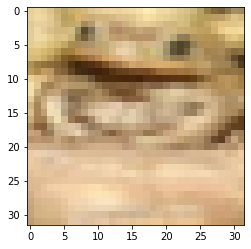

In [7]:
i =3
sample = testset[i]
image = sample['image']
label = sample['label']

print(image)

plt.imshow(image.permute(1,2,0))
#plt.imshow(label.reshape(1,2,0))
plt.show()

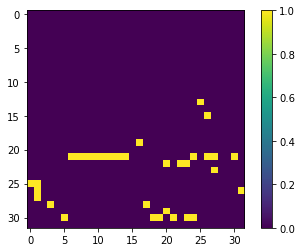

In [3]:
import torch
plt.imshow(label)
 
plt.colorbar()
plt.show()

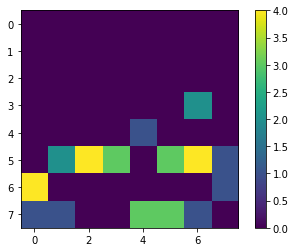

torch.Size([32, 32])
torch.Size([1, 1, 8, 8])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0625, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.1250, 0.2500, 0.1875, 0.0000, 0.1875, 0.2500, 0.0625],
          [0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0625],
          [0.0625, 0.0625, 0.0000, 0.0000, 0.1875, 0.1875, 0.0625, 0.0000]]]])
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0625, 0.0625, 0.0625,  ..., 0.0000, 0.0000, 0.0000],
          [0.0625, 0.0625, 0.0625,  ..., 0.0000, 0.0000, 0.0000]

/localdisk0/SCRATCH/cgarchbold/envs/py40/lib/python3.9/site-packages/torch/nn/functional.py:3982: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")


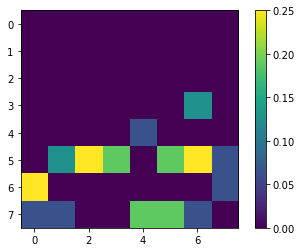

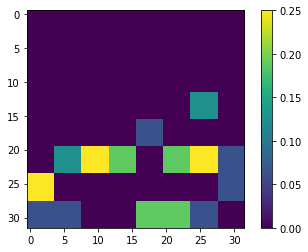

In [4]:
import torch.nn as nn
avg_pool = nn.AvgPool2d((4, 4), stride=4)
sum_pool = nn.AvgPool2d((4, 4), stride=4, divisor_override = 1 )

sum_pooled = sum_pool(label.unsqueeze(0).unsqueeze(0))
plt.imshow(sum_pooled.squeeze(0).squeeze(0))
plt.colorbar()
plt.show()

print(label.shape)
pooled = avg_pool(label.unsqueeze(0).unsqueeze(0))
print(pooled.shape)
plt.imshow(pooled.squeeze(0).squeeze(0))
plt.colorbar()
huh = torch.nn.functional.upsample_nearest(pooled,scale_factor=4)
print(pooled)
print(huh)
print(huh.shape)
plt.show()
plt.imshow(huh.squeeze(0).squeeze(0))
plt.colorbar()
plt.show()


In [5]:
print((torch.sqrt(sum(label-huh)**2)/len(label)).mean())



tensor(0.0017)
